#1 Imports & Parameters

In [7]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

N = 200_000
rng = np.random.default_rng(42)

We start with an urn containing:
- 3 red balls
- 4 blue balls
- 2 black balls

We then roll a fair dice ONCE:
if the result is:
- a prime number; then we add a black ball
- is 6; then we add a red ball
- is 1 or 4; then we add a blue ball

The next cell will run a vectorized simulation of the amount of independent trials (N) and stores the rolls, p_red (Probability of red each outcome) draw_red (if the ball was red or not)

In [17]:
rolls = rng.integers(1, 7, size=N)

p_red = np.where(
    np.isin(rolls, [2, 3, 5]), 3/10,
    np.where(rolls == 6,        4/10, 3/10)
)

draw_red = rng.random(N) < p_red

draw_red[:10], p_red[:10], rolls[:10]


(array([False,  True, False,  True, False,  True, False, False,  True,
        False]),
 array([0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]),
 array([4, 4, 1, 3, 3, 5, 2, 5, 5, 2]))

**Estimating the probability of red using the simulation**

The monte carolo estimate is the sample mean of the red indicator, in which we also report a 95% normal-approximation confidence interval

Monte Carlo estimate P(red) = 0.318525
95% CI ≈ (0.316483, 0.320567)


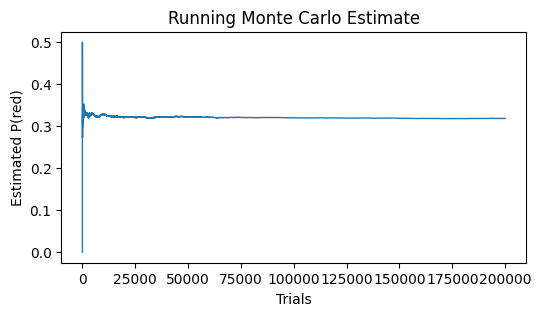

In [20]:
p_hat = draw_red.mean()

se = np.sqrt(p_hat * (1 - p_hat) / N)
ci = (p_hat - 1.96 * se, p_hat + 1.96 * se)

print(f"Monte Carlo estimate P(red) = {p_hat:.6f}")
print(f"95% CI ≈ ({ci[0]:.6f}, {ci[1]:.6f})")

running = np.cumsum(draw_red) / (np.arange(N) + 1)
plt.figure(figsize=(6,3))
plt.plot(running, lw=1)
plt.xlabel("Trials")
plt.ylabel("Estimated P(red)")
plt.title("Running Monte Carlo Estimate")
plt.show()


We condition the die on the outcomes:
 - P(prime) = 3/6, P(red|prime) = 3/10
 - P(6) = 1/6, P(red|6) = 4/10
 - P(other) = 2/6, P(red|other) = 3/10 So
$$
\mathbb{P}(\text{red})
= \mathbb{P}(\text{prime})\,\mathbb{P}(\text{red}\mid\text{prime})
+ \mathbb{P}(6)\,\mathbb{P}(\text{red}\mid 6)
+ \mathbb{P}(\text{other})\,\mathbb{P}(\text{red}\mid\text{other})
= \frac{3}{6}\cdot\frac{3}{10}
+ \frac{1}{6}\cdot\frac{4}{10}
+ \frac{2}{6}\cdot\frac{3}{10}
= \frac{19}{60} \approx 0.316\overline{6}.
$$
And we compare this exact value to the simulation estimate from the previos part.

In [23]:
p_theory = (3/6)*(3/10) + (1/6)*(4/10) + (2/6)*(3/10)
print(f"Theoretical P(red) = {p_theory:.12f}  (= 19/60)")

abs_err = abs(p_hat - p_theory)
print(f"Absolute error |p_hat - p_theory| = {abs_err:.6f}")

Theoretical P(red) = 0.316666666667  (= 19/60)
Absolute error |p_hat - p_theory| = 0.001858
